In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [215]:
warnings.simplefilter(action='ignore')
plt.style.use('seaborn-v0_8')


In [216]:
Data = pd.read_csv('cardata.csv')
Data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [217]:
Data.shape

(301, 9)

In [218]:
Data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [219]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [220]:
Data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


- 'Selling_Price' Column is the Target
- 'Kms_Driven' Column means Kilometers driven by the car

In [221]:
# Checking Missing Values
Data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

## PreProcessing

In [222]:
Data['Year']

0      2014
1      2013
2      2017
3      2011
4      2014
       ... 
296    2016
297    2015
298    2009
299    2017
300    2016
Name: Year, Length: 301, dtype: int64

In [223]:
 np.max(Data['Year'])

2018

In [224]:
# Replace "Year" with "Age" to show each car’s age as of 2019

Data['Age'] = 2019 - Data['Year']
Data.drop('Year', axis=1, inplace=True)

In [225]:
Data

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,6
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,2
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,8
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,5
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,3
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,4
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,10
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,2


# Type of Columns
## Categorical

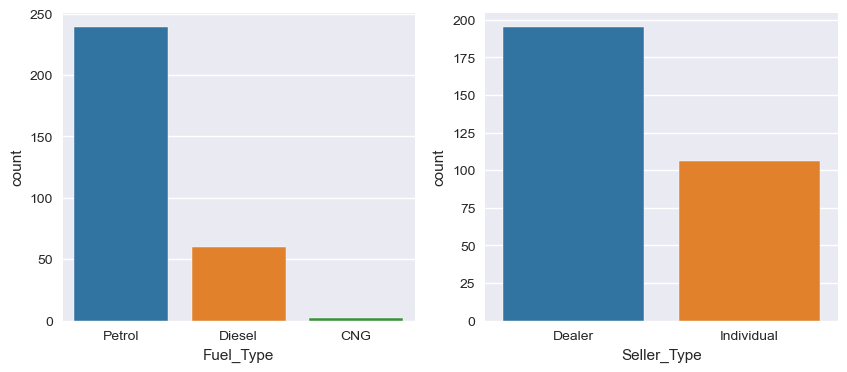

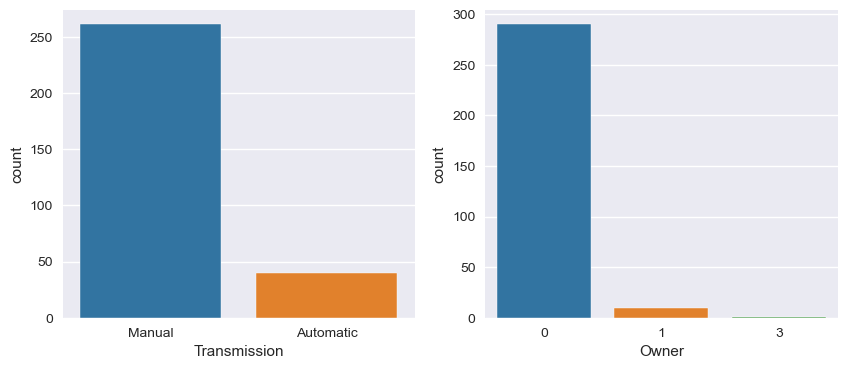

In [226]:
Categorical = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
i = 0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    plt.subplot(1,2,1)
    n_colors = Data[Categorical[i]].nunique()
    sns.countplot(x=Categorical[i], data=Data, palette=sns.color_palette("tab10", n_colors))
    i += 1
    plt.subplot(1,2,2)
    n_colors = Data[Categorical[i]].nunique()
    sns.countplot(x=Categorical[i], data=Data, palette=sns.color_palette("tab10", n_colors))
    i += 1
    plt.show()

## Numerical

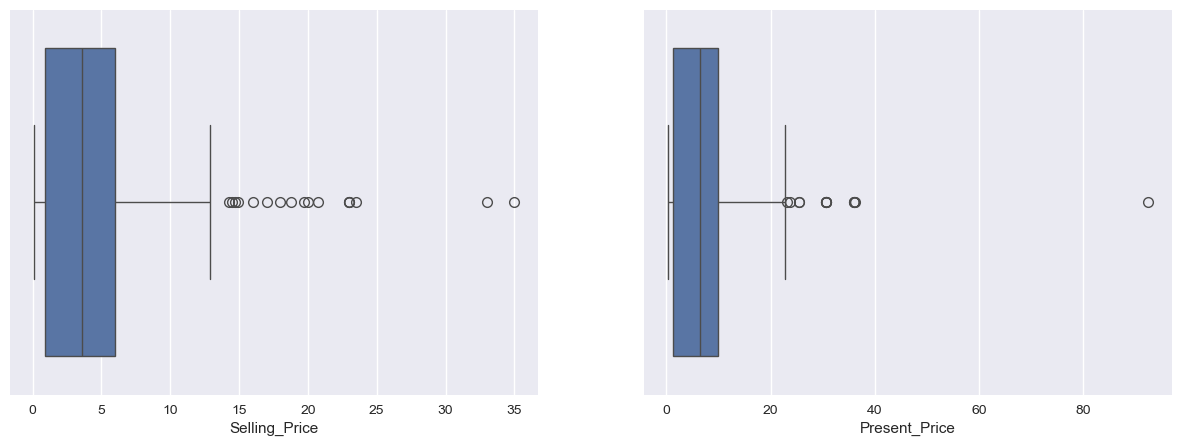

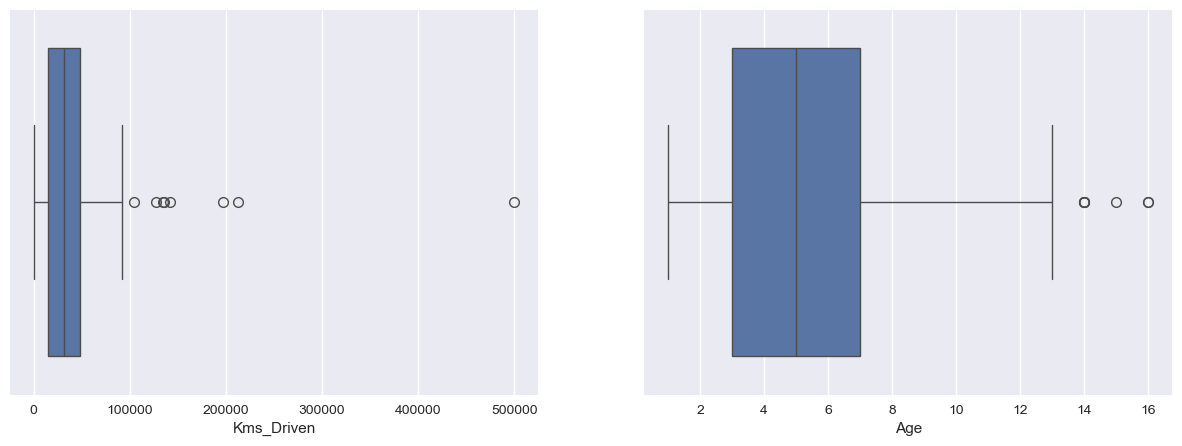

In [227]:
Numerical = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Age']
i = 0
while i < 4:
    fig = plt.figure(figsize=[15,5])
    plt.subplot(1,2,1)
    sns.boxplot(x=Numerical[i], data=Data)
    i += 1
    plt.subplot(1,2,2)
    sns.boxplot(x=Numerical[i], data=Data)
    i += 1
    plt.show()

In [228]:
# Observing Correlation for Numerical Columns

Data.corr(numeric_only=True)

,Selling_Price,Present_Price,Kms_Driven,Owner,Age
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104
Age,-0.236141,0.047584,0.524342,0.182104,1.000000


In [229]:
# Check the distinct values in each Categorical Column
# 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'

print(pd.unique(Data["Fuel_Type"]))
print(pd.unique(Data["Seller_Type"]))
print(pd.unique(Data["Transmission"]))
print(pd.unique(Data["Owner"]))

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [230]:
Data["Fuel_Type"].replace({"Petrol":2, "Diesel":3, "CNG":4}, inplace=True)
Data["Seller_Type"].replace({"Dealer":2, "Individual":3}, inplace=True)
Data["Transmission"].replace({"Manual":2, "Automatic":3}, inplace=True)
Data

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,2,2,2,0,5
1,sx4,4.75,9.54,43000,3,2,2,0,6
2,ciaz,7.25,9.85,6900,2,2,2,0,2
3,wagon r,2.85,4.15,5200,2,2,2,0,8
4,swift,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,3,2,2,0,3
297,brio,4.00,5.90,60000,2,2,2,0,4
298,city,3.35,11.00,87934,2,2,2,0,10
299,city,11.50,12.50,9000,3,2,2,0,2


In [231]:
# Delete 'Car_Name' Column to simplify the data
Data.drop(labels='Car_Name', axis=1, inplace=True)
Data

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,3,2,2,0,3
297,4.00,5.90,60000,2,2,2,0,4
298,3.35,11.00,87934,2,2,2,0,10
299,11.50,12.50,9000,3,2,2,0,2


## Create Model

In [232]:
# Split features and target variable

X = Data.drop('Selling_Price', axis=1)
Y = Data['Selling_Price']

In [233]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print("X train: ", X_train.shape)
print("X test: ", X_test.shape)
print("Y train: ", Y_train.shape)
print("Y test: ", Y_test.shape)

X train:  (240, 7)
X test:  (61, 7)
Y train:  (240,)
Y test:  (61,)


In [234]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [235]:
Model = LinearRegression()
Model.fit(X_train, Y_train)

LinearRegression()

In [236]:
Y_pred = Model.predict(X_test)

In [237]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Square: ', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R2 Score: ', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error:  1.153004591615892
Mean Squared Error:  3.2876460857158407
Root Mean Square:  1.8131867211392876
R2 Score:  0.8484549412090379


## Imrove the Model

In [238]:
k_fold = KFold(10)
print(cross_val_score(Model, X, Y.ravel (), cv=k_fold, n_jobs=1))

[ 6.63522141e-01  8.80842763e-01  7.23708463e-01  8.63126108e-01
 -4.36488306e+01 -1.07944231e+03 -3.50129071e-01  7.84378582e-01
  8.27975783e-01  8.74089252e-01]


In [239]:
Data

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,3,2,2,0,3
297,4.00,5.90,60000,2,2,2,0,4
298,3.35,11.00,87934,2,2,2,0,10
299,11.50,12.50,9000,3,2,2,0,2


In [240]:
len(Data)/10

30.1

In [241]:
Data1 = Data[Data.index < 120]
Data2 = Data[Data.index > 210]

Data3 = pd.concat([Data1, Data2], axis=0)
Data3.reset_index(drop=True, inplace=True)
Data3

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
205,9.50,11.60,33988,3,2,2,0,3
206,4.00,5.90,60000,2,2,2,0,4
207,3.35,11.00,87934,2,2,2,0,10
208,11.50,12.50,9000,3,2,2,0,2


In [242]:
X2 = Data3.drop('Selling_Price', axis=1)
Y2 = Data3['Selling_Price']
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=1)
Model2 = LinearRegression()
Model2.fit(X_train2, Y_train2)

LinearRegression()

In [243]:
Y_pred2 = Model2.predict(X_test2)

In [244]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test2, Y_pred2))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test2, Y_pred2))
print('Root Mean Square: ', np.sqrt(metrics.mean_squared_error(Y_test2, Y_pred2)))
print('R2 Score: ', metrics.r2_score(Y_test2, Y_pred2))

Mean Absolute Error:  1.234406869775422
Mean Squared Error:  2.623898258077035
Root Mean Square:  1.619845133979491
R2 Score:  0.8793462370195004


#### R2 Score(2) = 0.88 > R2 Score(1) = 0.84

In [245]:
print("Model Intercept =", Model2.intercept_)
print("Model Coefs =", Model.coef_)

Model Intercept = -1.696235044202946
Model Coefs = [ 4.41987483e-01 -4.82835255e-06  1.54833224e+00 -1.20366204e+00
  1.86575915e+00  3.87178280e-01 -4.23406978e-01]


In [246]:
Y_pred2 = Model2.predict([[11.23, 42000, 1, 4, 6, 1,10]])
Y_pred2

array([6.23558857])

### with a simple Linear Regression Model for a car with these feautures:
- Present price = 11.23
- Kms driven = 42000
- Fuel type = Petrol
- Seller type = Dealer
- Transmission = Manual
- Owner = 1
- Age = 10
### the predicted price is 6.23

## Now let's create a better Model

### Check Noises in Categorical Columns

In [247]:
print(pd.unique(Data["Fuel_Type"]))
print(pd.unique(Data["Seller_Type"]))
print(pd.unique(Data["Transmission"]))
print(pd.unique(Data["Owner"]))

[2 3 4]
[2 3]
[2 3]
[0 1 3]


### There no Noise here!

### Check Noises in Numerical Columns

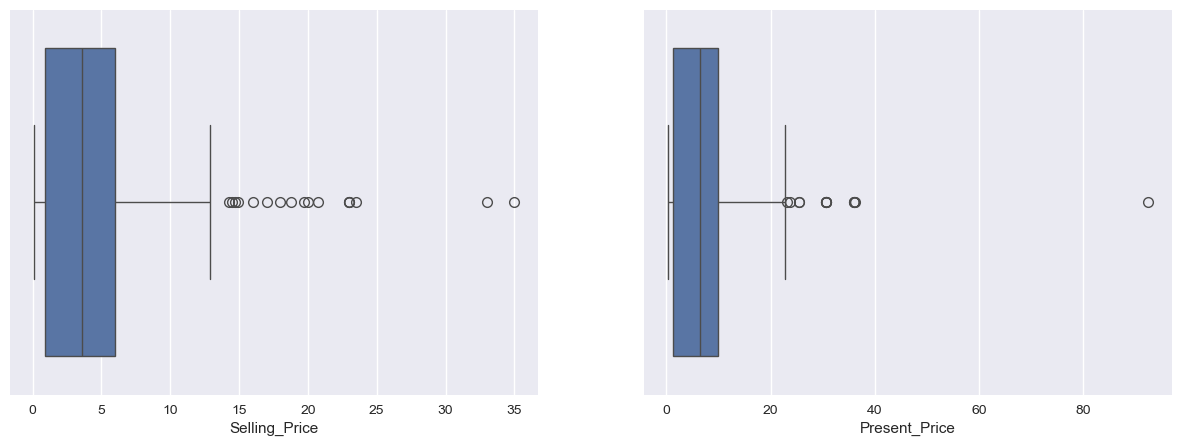

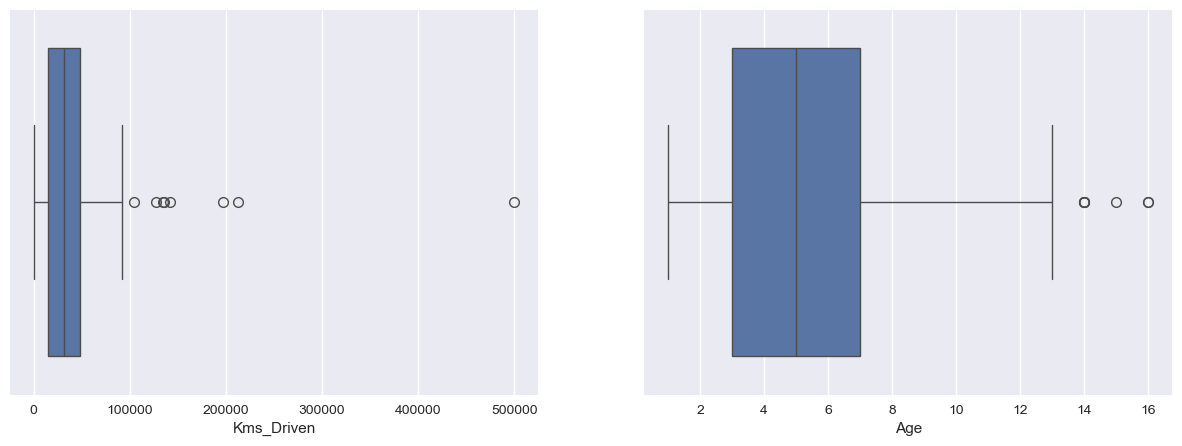

In [254]:
Numerical = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Age']
i = 0
while i < 4:
    fig = plt.figure(figsize=[15,5])
    plt.subplot(1,2,1)
    sns.boxplot(x=Numerical[i], data=Data)
    i += 1
    plt.subplot(1,2,2)
    sns.boxplot(x=Numerical[i], data=Data)
    i += 1
    plt.show()

- Selling price < 30
- Present price < 80
- Kms driven < 400000
- No Noise in Numerical columns!

## Let's create the new Model

### Simple one:

In [255]:
X = pd.DataFrame(Data, columns = ['Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Age'])
Y = Data.Selling_Price.values.reshape(-1,1)
Data

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,3,2,2,0,3
297,4.00,5.90,60000,2,2,2,0,4
298,3.35,11.00,87934,2,2,2,0,10
299,11.50,12.50,9000,3,2,2,0,2


In [256]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [257]:
r2 = metrics.r2_score(Y_test, Y_pred)
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Square: ', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R2 Score: ', r2)

Mean Absolute Error:  1.0000326012144765
Mean Squared Error:  2.1885564456572233
Root Mean Square:  1.4793770464818032
R2 Score:  0.913418172122469


#### Can it be better?
#### Let's try!
#### make features Non-Linear
#### Dimension = X^2

In [258]:
# function for checking dimension

def check (Dimension, testsize):
    r2 = 0.913418172122469
    for column in X:
        New_Col_Name = column + str(Dimension)
        New_Col_Val = X[column]**Dimension
        X.insert(0, New_Col_Name, New_Col_Val)
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = testsize, random_state = 0)
        New_Model = LinearRegression()
        New_Model.fit(X_train, Y_train)
        Y_pred = New_Model.predict(X_test)
        r2_New = metrics.r2_score(Y_test, Y_pred)
        if r2_New < r2:
            X.drop([New_Col_Name], axis = 1, inplace = True)
        else:
            r2 = r2_New
    print('R2 Score: ', r2)



check(2,0.2)

R2 Score:  0.9311515383402565


In [259]:
X

,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,5
1,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,6
2,0,4,47610000,97.0225,9.85,6900,2,2,2,0,2
3,0,4,27040000,17.2225,4.15,5200,2,2,2,0,8
4,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...
296,0,9,1155184144,134.5600,11.60,33988,3,2,2,0,3
297,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,4
298,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,10
299,0,9,81000000,156.2500,12.50,9000,3,2,2,0,2


### R2 Score increased by 2% !

## to be continued ...